# [개념 필사]

# CHAPTER 04 <분류>

## 3. 앙상블 학습


> 개요

앙상블학습을 통한 분류: 여러 개의 분류기로부터의 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법

정형데이터 분류 시에 유용

항상 단일(기반) 분류기보다 성능 좋은 것 아님, BUT 단일 알고리즘보다 성능 뛰어날 확률 높음 (머신러닝 모델은 높은 유연성 중요)

학습 유형
* 보팅(**서로 다른** 알고리즘 결합)
* 배깅(**동일한** 알고리즘 결합,다른 샘플링) - 부트스트래핑 분할 방식 / 중헙 허용
* 부스팅 - 여러 분류기 순차적 학습, 앞에서 틀린 데이터에 대해 가중치 부여하면서 학습 진행
* 스태깅 - 여러 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 메타 모델로 재학습 시켜 결과 예측  


랜덤포레스트(배깅), 그래디언트 부스팅(> XGBoost, LightGBM)

> 보팅 ; 하드 보팅, 소프트 보팅

(1) 하드 보팅: 다수결

(2) 소프트 보팅: 분류기들의 레이블 값 결정 확률을 평균내서 가장 높은 레이블 값을 선택 / 비교적 예측 성능 좋음 -> 더 많이 사용
```
VotingClassifier : 보팅 방식의 앙상블 구현한 클래스
- estimators: 보팅에 사용될 여러 개의 분류기 객체 리스트, 튜플로 입력
- voting: 'hard'(디폴트), 'soft' 지정
```

## 4. 랜덤 포레스트

> 특징: 배깅의 대표적 알고리즘, 빠른 수행 속도, 기반 알고리즘으로 결정 트리 사용

부트스트래핑: 여러 개의 데이터셋을 중첩되게 분리하는 것 / 개별 트리가 학습하는 데이터셋은 중첩되게 샘플링된 데이터 / 서브세트 데이터 개수 = 전체 데이터 개수 (중첩)

> 하이퍼 파라미터 및 튜닝
* n_estimators: 랜덤 포레스트에서 결정 트리 개수 지정, 10개 (디폴트)
* max_features: 결정트리 인자와 동일 / 디폴트값이 'auto' (sqrt)
* max_depth, min_samples_leaf, min_samples_split


```
RandomForestClassifier
```

## 5. GBM (Gradient Boosting Machine)

> 부스팅 알고리즘: 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가며 학습하는 방식 / 과적합에 강함

(1) 에이다 부스트(Adaptive boosting): 약한 학습기가 순차적으로 오류 값에 대해 가중치를 부여한 예측 결정 기준을 **모두 결합** 해 예측 수행

(2) 그래디언트 부스트: 에이다 부스트와 유사하지만, 가중치 업데이트에 '경사 하강법' 사용 / 회귀 가능 / 일반적으로 랜덤포레스트 보다 예측 성능 좋음 BUT 수행 시간 오래 걸림

* 경사 하강법: 오류식(실제값-예측값) h(x)=y-F(x) 를 최소화하는 방향으로, 반복적으로 가중치 값을 업데이트 하는 것


```
GradientBoostingClassifier
```


> 하이퍼 파라미터
* loss: 경사 하강법에서 사용할 비용 함수 지정 / 'deviance' 디폴트
* learning_rate: GBM 학습 진행마다 적용되는 학습률 / Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수, 0~1 / n_estimators 와 상호 보완적으로 조합해 사용해야함 / 0.1 디폴트
* n_estimators: weak learner의 개수 / 100 디폴트
* subsample: weak learner가 학습에 사용하는 데이터 샘플링 비율 / 1 디폴트

## 6. XGBoost (eXtra Gradient Boost)

> XGBoost: GBM 기반, 시간 오래 걸림 및 과적합 문제 해결

* 장점: 뛰어난 예측성능, GBM 대비 빠른 수행 시간, 과적합 규제 기능 존재, 나무 가지치기, 자체 내장된 교차 검증, 결손값 자체 처리 기능, 조기 중단 기능 (지정한 반복횟수에 도달하지 않더라도 오류가 더 이상 개선되지 않으면 수행 중지)

```
사이킷런 래퍼 클래스

XGBClassifier

XGBRegressor
```

> **파이썬 래퍼 XGBoost 하이퍼 파라미터**

(1) 일반 파라미터

(2) 부스터 파라미터: 대부분의 하이퍼 파라미터가 여기에 속함
* eta[defa나t=0.3, alias:learning_rate]: GBM의 학습률과 동일
* num_boost_rounds: = n_estimators
* min_child_weight: 과적합 조절 시, 트리에서 추가적으로 가지를 나눌지 결정하기 위해 필요한 데이터들의 weight 총합
* gamma[defa니t=0, alias:min_split_loss]: 리프 노드 분리를 결정하는 최소 손실 값
* max_depth[default=6]
* sub_sample[default=1]: = GBM의 subsampe
* colsample_bytree[default=l]: max_features와 유사
* lambda[default=1, alias:reg_lambda]: L2 Regularization 적용값. 클수록 과적합 감소 효과
* alpha[default=0, alias:reg_alpha]: L1 Regularization 적용값. 클수록 과적합 감소 효과
*  scale_pos_weight[default=1]: 비대칭한 클래스로 구성된 데이터셋의 균형 유지하기 위한 파라미터


(3) 학습 태스크 파라미터: 학습 수행 시 객체 함수, 평가 지표 등 설정

>> 과적합 문제 해결 방안: eta 낮추기 (num_round 올리기) / max_depth 낮추기 / min_child_weight 낮추기 / gamma 높이기 / subsample, colsample_bytree 조정

> 위스콘신 유방암 예측 (파이썬 래퍼)

* 양성 종양 or 악성 종양 / 피처에 따라 종양 예측
* xgboost의 자체적인 교차 검증. 성능 평가, 피처 중요도 등 시각화 기능 이용

* 파이썬 래퍼, 전용 객체인 DMatrix 사용 (data=, label=)
* 하이퍼 파라미터 설정 (주로 딕셔너리 형태로 입력)
* 하이퍼 파라미터를 모듈의 train() 함수에 파라미터로 전달해야함
* 조기중단: train() 에 early_stopping_rounds 파라미터로 설정 (평가용 데이터세트&eval_metric 함께 설정해야함)

* predict()의 반환값: 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값 반환! (예측결괏값을 반환하는 로직 추가필요)

> **사이킷런 래퍼 XGBoost**

fit(). predict()만으로 학습, 예측 가능

다른 ML 알고리즘과의 호환성 좋음

> 위스콘신 유방암 예측 (파이썬 래퍼)

* 조기중단 파라미터 > fit() 에 입력

# [코드 필사]

* 보팅 앙상블로 유방암 데이터셋 예측 (로지스틱, KNN 기반)

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [2]:
# VotingClassifier 로 보팅 분류기 생성

# 개별 모델: 로지스틱 회귀, KNN
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=156)

# 학습, 예측, 평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델 학습, 예측, 평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


* 랜덤 포레스트; 사용자 행동 인식데이터 세트

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
feature_name_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/features.txt',
                            sep='\s+',header=None,names=['column_index','column_name'])

In [5]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0],axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df

In [6]:
import pandas as pd

def get_human_dataset():

  # 공백 분리
  feature_name_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/features.txt',sep='\s+',header=None,names=['column_index','column_name'])

  # 중복된 피처명 처리하는 get_new_feature_name_df()이용
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # 데이터프레임에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습, 테스트 피처 데이터프레임 로딩. 칼럼명은 feature_name 적용
  X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/X_train.txt',sep='\s+',names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/X_test.txt',sep='\s+',names=feature_name)

  # 학습, 테스트 레이블 로딩. 칼럼명은 action
  y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y_train.txt',sep='\s+',header=None,names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y_test.txt',sep='\s+',header=None,names=['action'])

  # 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

<ipython-input-5-75672b75b266>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0],axis=1)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset() 를 이용해 학습/테스트용 데이터프레임 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습/별도 데이터셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8) # 재수행 마다 동일한 결과 출력 위해 random_state=0 설정
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9220


In [8]:
# GridSearchCV 를 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf': [1,6,12],
    'min_samples_split': [2,8,16]
}
# 랜덤포레스트분류기 생성, GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 16}
최고 예측 정확도: 0.9157


In [9]:
# 최적 하이퍼 파라미터로 재학습 > 다른 데이터셋에서 예측 성능 측정

rf_clf1 = RandomForestClassifier(n_estimators=100,  min_samples_leaf=6, max_depth=16, min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9253


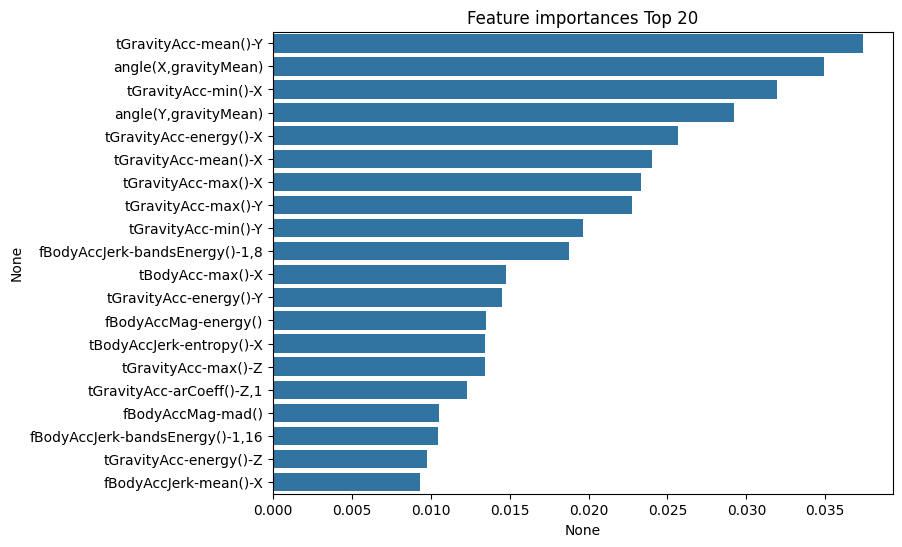

In [10]:
# 피처 중요도 시각화

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

* GBM ; 사용자 행동 데이터 세트 예측 분류

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초'.format(time.time() - start_time))

In [ ]:
pip install xgboost==1.5.0

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
import xgboost

print(xgboost.__version__)

* 위스콘신 유방암 종양 예측 ; 파이썬 래퍼

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

악성 - 0

양성 - 1

In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

In [ ]:
# 피처용 데이터프레임, 라벨용 시리즈 객체 추출
# 라벨칼럼(맨 마지막) > 슬라이싱 추출
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# train 을 다시 쪼개서 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

In [ ]:
# 데이터 프레임 <-> DMatrix 변환 예제

# 학습, 검증, 테스트용 DMatrix  생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
# 하이퍼 파라미터 설정 (주로 딕셔너리 형태로 입력)

params = {'max_depth':3,
          'eta':0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'}

num_rounds=400

In [ ]:
# 학습 데이터셋은 'train' 또는 평가 데이터셋은 'eval'로 명기
eval_list=[(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval)]만 명기

# 하이퍼 파라미터, 조기중단 파라미터 전달
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds,
                      early_stopping_rounds=50, evals=eval_list)

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0 으로 결정하여 preds 리스트에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score,roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None): # ROC AUC는 예측 확률값 기반으로 계산 > 함수의 인자로 받을 수 있도록
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, preds, pred_probs)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

* 위스콘신 유방암 종양 예측 ; 사이킷런 래퍼

In [ ]:
from xgboost import XGBClassifier

# Warning 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [ ]:
get_clf_eval(y_test, w_preds, w_pred_proba)

In [ ]:
# 조기중단 수행
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr.values, y_tr.values), (X_val.values, y_val.values)]
xgb_wrapper.early_stopping_rounds = 50
xgb_wrapper.fit(X_tr.values, y_tr.values, eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test.values)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test.values)[:, 1]

In [ ]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

In [ ]:
# 조기중단 파라미터를 10으로 설정하고 재학습
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals, eval_metric="logloss", early_stopping_rounds=10, verbose=True)

wb10_preds = xgb_wrapper.predict(X_test)
wb10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, wb10_preds, wb10_pred_proba)

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax) #사이킷런 래퍼 클래스를 입력해도 무방